#Random Forest

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,precision_recall_curve,auc,roc_auc_score,recall_score,classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
from sklearn import svm
import random

In [13]:
random_seed = 100
random.seed(random_seed)
np.random.seed(random_seed)

df = pd.read_csv("../dataset/aps_failure_training_set.csv")
df_test = pd.read_csv("../dataset/aps_failure_test_set.csv")

In [14]:
df.head()


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


### Renombrar valores de la columna objetivo. Mapear los valores na to NULL

In [6]:
df = df.rename(columns = {'class' : 'Flag'})
df['Flag'] = df.Flag.map({'neg':0, 'pos':1})
df = df.replace(['na'],[np.NaN])

In [6]:
df.isnull().any()


Flag      False
aa_000    False
ab_000     True
ac_000     True
ad_000     True
ae_000     True
af_000     True
ag_000     True
ag_001     True
ag_002     True
ag_003     True
ag_004     True
ag_005     True
ag_006     True
ag_007     True
ag_008     True
ag_009     True
ah_000     True
ai_000     True
aj_000     True
ak_000     True
al_000     True
am_0       True
an_000     True
ao_000     True
ap_000     True
aq_000     True
ar_000     True
as_000     True
at_000     True
          ...  
dl_000     True
dm_000     True
dn_000     True
do_000     True
dp_000     True
dq_000     True
dr_000     True
ds_000     True
dt_000     True
du_000     True
dv_000     True
dx_000     True
dy_000     True
dz_000     True
ea_000     True
eb_000     True
ec_00      True
ed_000     True
ee_000     True
ee_001     True
ee_002     True
ee_003     True
ee_004     True
ee_005     True
ee_006     True
ee_007     True
ee_008     True
ee_009     True
ef_000     True
eg_000     True
Length: 171, dtype: bool

In [7]:
Count = pd.value_counts(df['Flag'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Class count")
plt.xlabel("Flag")
plt.ylabel("Frequency")

TypeError: Empty 'DataFrame': no numeric data to plot

In [8]:
df_X = df.loc[:,df.columns != 'Flag']
df_Y = df.loc[:,df.columns == 'Flag']

df_X = df_X.apply(pd.to_numeric)

df_X= df_X.fillna(df_X.mean()).dropna(axis =1 , how ='all')

scaler = StandardScaler()

scaler.fit(df_X)

df_X = scaler.transform(df_X)

pca = PCA(0.95)

pca.fit(df_X)

pca.n_components_

82

In [ ]:
df_X = pca.transform(df_X)

df_X= pd.DataFrame(df_X)

In [ ]:
df_test = df_test.rename(columns = {'class' : 'Flag'})
df_test = df_test.replace(['na'],[np.NaN])

Count = pd.value_counts(df_test['Flag'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Class count")
plt.xlabel("Flag")
plt.ylabel("Frequency")

df_test['Flag'] = df_test.Flag.map({'neg':0, 'pos':1})

df_test_X = df_test.loc[:,df_test.columns != 'Flag']
df_test_Y = df_test.loc[:,df_test.columns == 'Flag']

df_test_X = df_test_X.apply(pd.to_numeric)

df_test_X= df_test_X.fillna(df_test_X.mean()).dropna(axis =1 , how ='all')

scaler = StandardScaler()

scaler.fit(df_test_X)

df_test_X = scaler.transform(df_test_X)

pca = PCA(82)

pca.fit(df_test_X)

pca.n_components_

df_test_X = pca.transform(df_test_X)

df_test_X= pd.DataFrame(df_test_X)

In [11]:
X_train,X_validation,Y_train,Y_validation = train_test_split(df_X,df_Y,test_size = 0.2,random_state = 0)
DF = pd.concat([X_train,Y_train],axis = 1)

print("Percentage Neg in training: " , len(Y_train[Y_train.Flag == 0])/len(Y_train))
print("Percentage Pos in training: ", len(Y_train[Y_train.Flag == 1])/len(Y_train))
print("Total number of datapoints in training: ", len(Y_train))


print("Percentage Neg in Validation: " , len(Y_validation[Y_validation.Flag == 0])/len(Y_validation))
print("Percentage Pos in Validation: ", len(Y_validation[Y_validation.Flag == 1])/len(Y_validation))
print("Total number of datapoints in Validation: ", len(Y_validation))

NameError: name 'df_X' is not defined

In [ ]:
numberofrecords_pos = len(DF[DF.Flag == 1])
pos_indices = np.array(DF[DF.Flag == 1].index)

#Picking the indices of the normal class
neg_indices = DF[DF.Flag == 0].index

#out of indices selected, randomly select "x" number of records
random_neg_indices = np.random.choice(neg_indices, numberofrecords_pos, replace = False)
random_neg_indices =np.array(random_neg_indices)

#Appending the two indices
under_sample_indices = np.concatenate([pos_indices,random_neg_indices])

#Undersample dataset
under_sample_data = DF.loc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:,under_sample_data.columns != 'Flag']
Y_undersample = under_sample_data.loc[:,under_sample_data.columns == 'Flag']

print("Percentage Neg: " , len(under_sample_data[under_sample_data.Flag == 0])/len(under_sample_data))
print("Percentage Pos : ", len(under_sample_data[under_sample_data.Flag == 1])/len(under_sample_data))
print("Total number of datapoints : ", len(under_sample_data))

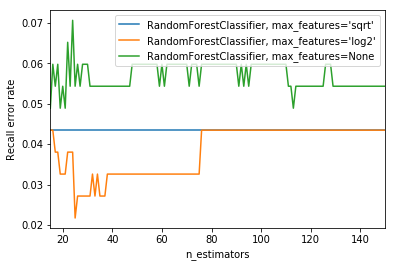

In [13]:
RANDOM_STATE = 123

import warnings
warnings.filterwarnings("ignore")
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_undersample, Y_undersample)

        # Record the OOB error for each `n_estimators=i` setting.
        y_pred = clf.predict(X_validation)
        recall = recall_score(Y_validation,y_pred)
        error = 1 - recall
        error_rate[label].append((i, error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("Recall error rate")
plt.legend(loc="upper right")
plt.show()

In [9]:
clf = RandomForestClassifier(n_estimators=25,max_features= 'log2',oob_score =True)

clf.fit(X_undersample,Y_undersample.values.ravel())

clf.oob_score_

y_pred = clf.predict(df_test_X)
recall_score(df_test_Y,y_pred)

NameError: name 'X_undersample' is not defined

In [10]:
confusion_matrix(df_test_Y,y_pred)


NameError: name 'df_test_Y' is not defined